In [50]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
import matplotlib.lines as mlines
import numpy as np
import pandas as pd
import rwthcolors
import eurographics_style
import glob
import re
import os.path

In [51]:
data_series = [
    #{
    #    'name': 'greedy',
    #    'label': 'Greedy',
    #    'color': 'rwth:yellow',
    #},
    {
        'name': 'kraevoy',
        'label': 'Kraevoy',
        'color': 'rwth:yellow',
    },
    {
        'name': 'praun',
        'label': 'Praun',
        'color': 'rwth:orange',
    },
    {
        'name': 'schreiner',
        'label': 'Schreiner',
        'color': 'rwth:red',
    },
    {
        'name': 'bnb_lower_bound',
        'label': 'B&B (Lower Bound)',
        'color': 'rwth:blue50',
    },
    {
        'name': 'bnb',
        'label': 'B&B',
        'color': 'rwth:blue',
    },
]

shrec_categories = [
    { 'id': 10, 'name': 'Hand' },
    { 'id': 15, 'name': 'Armadillo' },
    { 'id': 16, 'name': 'Bust' },
    { 'id':  5, 'name': 'Ant' },
    { 'id': 20, 'name': 'Fourleg' },
    { 'id': 18, 'name': 'Bearing' },
    { 'id':  3, 'name': 'Glasses' },
    { 'id':  1, 'name': 'Human' },
    
    { 'id':  4, 'name': 'Plane' },
    { 'id':  7, 'name': 'Octopus' },
    { 'id':  8, 'name': 'Table' },
    { 'id':  9, 'name': 'Teddy' },
    { 'id': 11, 'name': 'Plier' },
    { 'id': 12, 'name': 'Fish' },
    { 'id': 13, 'name': 'Bird' },
    { 'id': 17, 'name': 'Mech' },
    
#    { 'id':  2, 'name': 'Cup' },
#    { 'id':  6, 'name': 'Chair' },
#    { 'id': 14, 'name': 'Spring' },
#    { 'id': 19, 'name': 'Vase' },
    
]

#shrec_categories = sorted(shrec_categories, key=lambda x : x['name'])

def shrec_id_range(category_id):
    id_min = 1 + (category_id - 1) * 20
    id_max = 1 + category_id * 20
    return range(id_min, id_max)

In [55]:
output_dir = 'peseta:/local/born/layout-embedding-output'
shrec_results_dir = output_dir + '/shrec07_results'

plt.figure(figsize=(12,8))
#plt.figure(figsize=(20,8))
subplot_index = 0
for category in shrec_categories:
    subplot_index += 1
    category_id = category['id']
    category_name = category['name']
    
    items_list = []
    for mesh_id in shrec_id_range(category_id):
        stats_fn = shrec_results_dir + f'/stats_{mesh_id}.csv'
        stats_bnb_fn = shrec_results_dir + f'/stats_{mesh_id}_bnb.csv'
        if not os.path.exists(stats_fn):
            continue
        if not os.path.exists(stats_bnb_fn):
            continue
        
        stats_data = pd.read_csv(stats_fn)
        stats_bnb_data = pd.read_csv(stats_bnb_fn)
        
        item = {}
        for ds in data_series:
            field = ds['name']
            found_entry = stats_data[(stats_data['algorithm'] == field)]
            if len(found_entry) > 0:
                item[field] = float(found_entry['score'])
        
        #item['mesh_id'] = mesh_id
        item['bnb_lower_bound'] = float(stats_bnb_data['lower_bound'])
        #item['bnb_lower_bound'] = 0.99 * item['bnb']
        
        items_list.append(item)
    num_items = len(items_list)
    if num_items == 0:
        continue
    items = pd.DataFrame(items_list)
    items.sort_values(['bnb'], ignore_index=True, inplace=True)
    
    plt.subplot(4, 4, subplot_index)
    plt.title(f'{category_name}')
    for i, row in items.iterrows():
        x = i #row['mesh_id']
        vbar_min = min([row['kraevoy'], row['praun'], row['schreiner'], row['bnb_lower_bound'], row['bnb']])
        vbar_max = max([row['kraevoy'], row['praun'], row['schreiner'], row['bnb_lower_bound'], row['bnb']])
        plt.plot([x,x], [vbar_min, vbar_max], c='rwth:blue25', zorder=-1)
        for ds in data_series:
            if ds['name'] not in row:
                continue
            y = row[ds['name']]
            marker = 'o'
            s = 20
            if ds['name'] == 'bnb_lower_bound':
                marker = '_'
                s = 60
            plt.scatter(x, y, label=ds['label'], c=ds['color'], marker=marker, s=s)
    frame1 = plt.gca()
    frame1.axes.get_xaxis().set_visible(False)
    #frame1.axes.get_xaxis().set_ticks(np.arange(items.mesh_id.min(), items.mesh_id.max() + 1, 1))
plt.tight_layout()
plt.savefig('/home/pschmidt/layout-embedding-paper/img/shrec07-quantitative/plot.pdf')

<Figure size 864x576 with 0 Axes>

NameError: name 'cases' is not defined

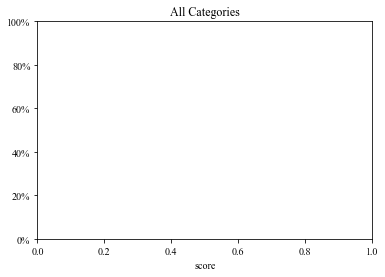

In [53]:
plt.figure()
plt.title('All Categories')
plt.xlabel('score')
plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
plt.ylim(0, 1)
for case in cases:
    algo = case['algo']
    ascending_score = np.sort(run_data.loc[algo]['score'])
    percentiles = np.linspace(0, 1, len(ascending_score))
    plt.plot(ascending_score, percentiles, label=case['label'], c=case['color'])
plt.legend(loc='lower right')

In [ ]:
run_data.set_index(['id'])

In [ ]:
plt.figure(figsize=(12,18))
subplot_index = 1
for c in categories:
    id_min = 1 + (c['id'] - 1) * 20
    id_max = 1 + c['id'] * 20
    c_data = run_data[run_data.index.get_level_values('id').isin(range(id_min, id_max))]
    if len(c_data) == 0:
        continue
    plt.subplot(6, 3, subplot_index)
    name = c['name']
    plt.title(f'{name} ({id_min}–{id_max})')
    plt.xlabel('score')
    
    for c_id in c_data['id']:
        print(f'id: {id}')
    
    subplot_index += 1
plt.tight_layout()

In [ ]:
plt.figure(figsize=(12,18))
subplot_index = 1
for c in categories:
    id_min = 1 + (c['id'] - 1) * 20
    id_max = 1 + c['id'] * 20
    c_data = run_data[run_data.index.get_level_values('id').isin(range(id_min, id_max))]
    if len(c_data) == 0:
        continue
    plt.subplot(6, 3, subplot_index)
    name = c['name']
    plt.title(f'{name} ({id_min}–{id_max})')
    plt.xlabel('score')
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.ylim(0, 1)
    for case in cases:
        algo = case['algo']
        ascending_score = np.sort(c_data.loc[algo]['score'])
        percentiles = np.linspace(0, 1, len(ascending_score))
        plt.plot(ascending_score, percentiles, label=case['label'], c=case['color'])
    plt.legend(loc='lower right')
    subplot_index += 1
plt.tight_layout()

In [5]:
cases = [
    {
        'algo': 'greedy',
        'label': 'Greedy',
        'color': 'rwth:red',
    },
    {
        'algo': 'greedy_brute_force',
        'label': 'Greedy (Brute Force)',
        'color': 'rwth:orange',
    },
    {
        'algo': 'bnb',
        'label': 'Branch-and-Bound',
        'color': 'rwth:blue',
    },
]

for case in cases:
    algo = case['algo']
    runtime_series = run_data.loc[algo]['runtime'].dropna()
    ascending_runtime = np.sort(runtime_series)
    percentiles = np.linspace(0, 1, len(ascending_runtime))

    plt.figure()
    plt.title(case['label'])
    plt.xlabel('runtime (s)')
    plt.gca().yaxis.set_major_formatter(PercentFormatter(1))
    plt.ylim(0, 1)
    if algo == 'bnb':
        plt.axvline(600, c='lightgray', linestyle='--', zorder=-1)
    plt.plot(ascending_runtime, percentiles, c=case['color'])
    
    print('avg {}: {} s'.format(algo, runtime_series.mean()))

NameError: name 'run_data' is not defined